In [1]:
# This is another example that I followed to learn more about machine learning and the data set 
# It was taken from https://machinelearninghd.com/wine-quality-dataset-machine-learning/
# The visualizations in this site were extremely helpful and helped me determine what I wanted to do for my project

In [3]:
# import libraries
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
# Read in the csv file
wine_data=pd.read_csv("winequality.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [5]:
# view the sample data and the shape
print(wine_data.shape)


(6497, 13)


In [6]:
#  Let see the sample data as well as shape wine quality dataset.
wine_data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4972,9.7,0.32,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.6,5,red
5074,7.3,0.38,0.21,2.0,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,5,red
3542,6.6,0.23,0.37,8.5,0.036,46.0,153.0,0.99576,3.20,0.48,9.4,6,white
346,5.6,0.34,0.10,1.3,0.031,20.0,68.0,0.99060,3.36,0.51,11.2,7,white
407,6.9,0.49,0.24,1.2,0.049,13.0,125.0,0.99320,3.17,0.51,9.4,5,white
3487,6.5,0.22,0.19,1.1,0.064,36.0,191.0,0.99297,3.05,0.50,9.5,6,white
4425,6.1,0.22,0.50,6.6,0.045,30.0,122.0,0.99415,3.22,0.49,9.9,6,white
5079,8.9,0.61,0.49,2.0,0.270,23.0,110.0,0.99720,3.12,1.02,9.3,5,red
1338,6.7,0.18,0.30,6.4,0.048,40.0,251.0,0.99560,3.29,0.52,10.0,5,white
2216,7.8,0.30,0.37,1.3,0.051,16.0,96.0,0.99410,3.32,0.62,10.0,5,white


In [7]:
# I usually like to use sample api in dataframe instead of head or tail as it provides a randomized sample of the entire
# dataset.
wine_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
wine_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
fixed acidity,6497,NaN,NaN,NaN,7.21531,1.29643,3.8,6.4,7,7.7,15.9
volatile acidity,6497,NaN,NaN,NaN,0.339666,0.164636,0.08,0.23,0.29,0.4,1.58
citric acid,6497,NaN,NaN,NaN,0.318633,0.145318,0,0.25,0.31,0.39,1.66
residual sugar,6497,NaN,NaN,NaN,5.44324,4.7578,0.6,1.8,3,8.1,65.8
chlorides,6497,NaN,NaN,NaN,0.0560339,0.0350336,0.009,0.038,0.047,0.065,0.611
free sulfur dioxide,6497,NaN,NaN,NaN,30.5253,17.7494,1,17,29,41,289
total sulfur dioxide,6497,NaN,NaN,NaN,115.745,56.5219,6,77,118,156,440
density,6497,NaN,NaN,NaN,0.994697,0.00299867,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497,NaN,NaN,NaN,3.2185,0.160787,2.72,3.11,3.21,3.32,4.01
sulphates,6497,NaN,NaN,NaN,0.531268,0.148806,0.22,0.43,0.51,0.6,2


In [9]:
# So we have 12 different variables, as I mentioned above the reason why we can explore doing regression and
# classification.

# We can perform regression on variable called quality and if we choose to predict winecolor variable,
# it becomes binary classification modeling. It is just the way we can look at it solving the problem.

## Exploratory Data Analysis

<AxesSubplot:>

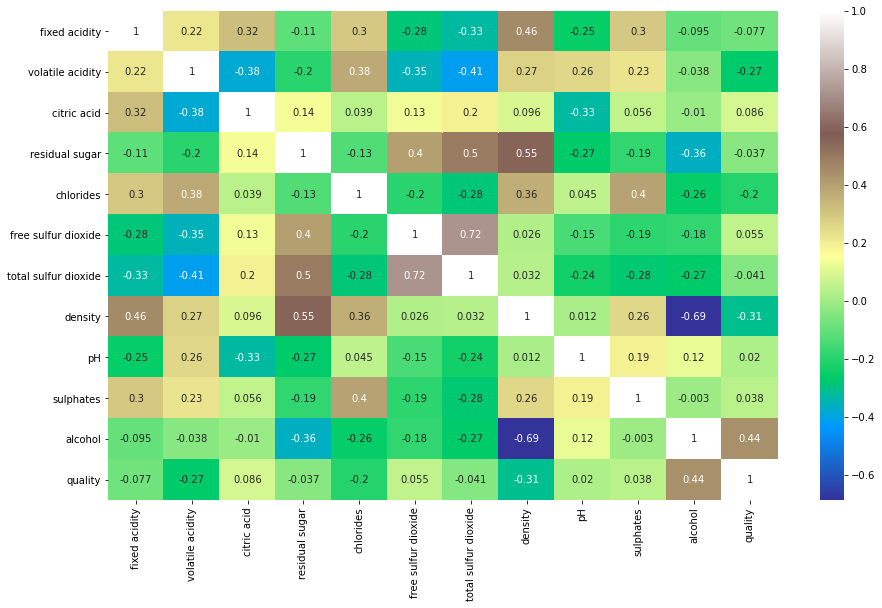

In [13]:
plt.figure(figsize=(15,9))
sns.heatmap(wine_data.corr(),cmap='terrain',annot=True)
# check correlation map

### We can see the following variables are correlated:
### - free sulphur dioxide vs total sulfur dioxide are strongly correlated 0.72
### - density vs alcohol are indirectly correlated -0.69

### If we perform regression, it will be a good idea to drop those variables. Let us continue with EDA.

C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\

Text(0.5, 1.0, 'Wine Quality as explained by Fixed Acidity')

<Figure size 720x432 with 0 Axes>

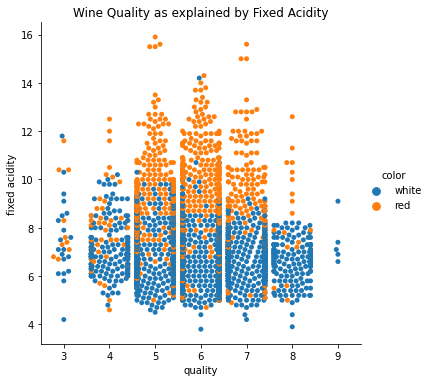

In [14]:
# get some idea of the data
figure = plt.figure(figsize = (10,6))
sns.catplot(x="quality", y="fixed acidity", hue="color", kind="swarm", data=wine_data)
plt.title("Wine Quality as explained by Fixed Acidity")

C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lbruc\anaconda3\envs\PythonAdv\lib\

Text(0.5, 1.0, 'Wine Quality as explained by Volatile Acidity')

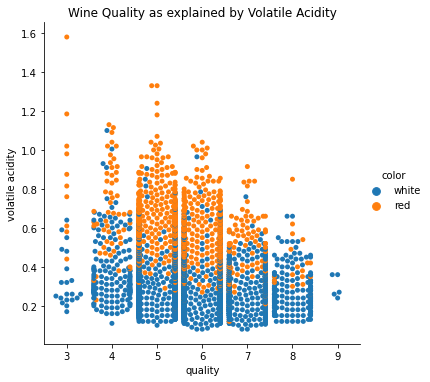

In [15]:
# inspect the relationship between quality and volatile acidity
sns.catplot(x = 'quality', y = 'volatile acidity', hue="color", kind="swarm", data = wine_data)
plt.title("Wine Quality as explained by Volatile Acidity")

## Data Modeling - Classification

In [ ]:
def impute_color(x):
    if x == 'white':
        return 0
    else:
        return 1
wine_data['color'] = wine_data['color'].apply(impute_color)

In [ ]:
# Create a simple function to convert the winecolor column into numerical column
wine_data.value_counts('color')

In [ ]:
# So it is imbalanced classification problem

#Splitting the dataframe into train and test split

from sklearn.model_selection import train_test_split
X = wine_data.drop('color',axis=1)
y = wine_data['color']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Creating an actual train and test split.

# Creating a classification model keep the imbalanced classification issue in perspective.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
# Data Modeling -Regression

In [ ]:
from sklearn.linear_model import LinearRegression
X = wine_data.drop('quality',axis=1)
y = wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print (np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
sns.distplot(y_test-y_pred)

In [ ]:
# Bell curve achieved.